`Pythonista - Saurus Ztrimus`

# Module 4 - Algo Trading using Classification


## Trade Call Prediction using Classification
In this module, we'd be covering the concept of classification and utilize our skills to solve the following queries – (Stock Price = Close Price)

### Problem Statements
- [Query 4.1](#id1)
- [Query 4.2](#id2)

## <a id="id1">Query 4.1</a>
Import the csv file of the stock which contained the Bollinger columns as well.

> Create a new column 'Call' , whose entries are - 
- 'Buy' if the stock price is below the lower Bollinger band 
- 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
- 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
- 'Short' if the stock price is above the upper Bollinger band 

> Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

> Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Query 4.1a Create new column "Call"
Import the csv file of the stock which contained the Bollinger columns as well.

Create a new column 'Call' , whose entries are - 
- 'Buy' if the stock price is below the lower Bollinger band 
- 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
- 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
- 'Short' if the stock price is above the upper Bollinger band 

In [2]:
stock_data = pd.read_csv("./week2.csv",index_col=0)
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data = stock_data.set_index('Date')
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,0.362566,Slight or No change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,-0.230366,Slight or No change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,0.939337,Slight positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,-0.395113,Slight or No change


#### 4.1a.1 Adding Bollinger Bands Columns

In [3]:
rolling_avg = stock_data['Close Price'].rolling(window=14).mean()
rolling_std = stock_data['Close Price'].rolling(window=14).std()

In [4]:
stock_data['lower'] = rolling_avg-2*rolling_std
stock_data['avg'] = rolling_avg
stock_data['upper'] = rolling_avg+2*rolling_std
stock_data.dropna(inplace=True)
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend,lower,avg,upper
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,INFY,EQ,977.05,969.3,979.70,958.55,971.25,971.40,969.49,2754303,...,81421,1822506,66.17,2017,6,-0.578271,Slight negative,936.708789,968.671429,1000.634068
2017-06-02,INFY,EQ,971.40,973.4,975.45,964.20,966.00,969.45,968.76,1958983,...,48927,1396644,71.29,2017,6,-0.200741,Slight or No change,939.543472,969.950000,1000.356528
2017-06-05,INFY,EQ,969.45,970.0,972.00,957.05,959.00,958.75,961.71,2731349,...,83794,1941199,71.07,2017,6,-1.103719,Negative,940.316774,970.217857,1000.118940
2017-06-06,INFY,EQ,958.75,965.0,987.50,964.40,980.00,979.35,980.08,3504343,...,83178,2018029,57.59,2017,6,2.148631,Positive,943.638076,972.114286,1000.590495
2017-06-07,INFY,EQ,979.35,985.0,988.90,945.00,959.30,961.30,963.75,6227523,...,139990,2519343,40.45,2017,6,-1.843059,Negative,943.554569,972.082143,1000.609717


#### 4.1a.2 Create a new column `Call`

whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [5]:
def classifying_call(close,lower,avg,upper):
    if close <= lower:
        return 'Buy'
    if (close > lower) and (close <= avg):
        return 'Hold Buy/Liquidate Short'
    elif (close > avg) and (close <= upper):
        return 'Hold Short/Liquidate Buy'
    elif close > upper:
        return 'Short'

In [6]:
stock_data["Call"] = stock_data.apply(lambda record : classifying_call(record['Close Price'], record['lower'], record['avg'], record['upper']), axis = 1) 

In [7]:
stock_data.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy',
       'Short'], dtype=object)

In [8]:
stock_data.Call.value_counts()

Hold Short/Liquidate Buy    250
Hold Buy/Liquidate Short    189
Short                        28
Buy                          14
Name: Call, dtype: int64

In [9]:
stock_data.to_csv('./week4.csv')

### Query 4.1b Training Different Classification models

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

#### 4.1b.1 Training Testing Split

In [10]:
Input = stock_data[['lower','avg','upper','Close Price']]
Input.head()

,lower,avg,upper,Close Price
Date,,,,
2017-06-01,936.708789,968.671429,1000.634068,971.40
2017-06-02,939.543472,969.950000,1000.356528,969.45
2017-06-05,940.316774,970.217857,1000.118940,958.75
2017-06-06,943.638076,972.114286,1000.590495,979.35
2017-06-07,943.554569,972.082143,1000.609717,961.30


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(stock_data.Call.ravel())
Output = pd.DataFrame(numbered_label)
Output.head()

,0
0,2
1,1
2,1
3,2
4,1


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

In [13]:
y_train = y_train.values.reshape(len(y_train))
y_test = y_test.values.reshape(len(y_test))

#### 4.1b.2 Training Different models
#### Different Classification Algorithm
1. Naive bayes (Linear Classifier)
2. Logistic Regression (Linear Classifier)
3. Support Vector Machine
4. K-NEAREST NEIGHBOUR (KNN)
5. Random Forest

In [14]:
classifers_train_test = pd.DataFrame(columns=["Classifier","Train_AUC", "Test_AUC"])

#### Naive bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
training_accuracy = gaussian_classifier.score(X_train, y_train).round(2)
training_accuracy

0.58

In [17]:
testing_accuracy = gaussian_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.52

In [18]:
classifers_train_test.loc[0] = ["Naive Bayes", training_accuracy, testing_accuracy]

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000,class_weight='balanced', multi_class="ovr", solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
training_accuracy = lr.score(X_train, y_train).round(2)
training_accuracy

0.97

In [21]:
testing_accuracy = lr.score(X_test, y_test).round(2)
testing_accuracy

0.98

In [22]:
classifers_train_test.loc[1] = ["Logistic Regression", training_accuracy, testing_accuracy]

#### SVM

In [23]:
from sklearn.svm import SVC
svm_classifier = SVC(verbose=True, gamma='scale',class_weight='balanced')
svm_classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [24]:
training_accuracy = svm_classifier.score(X_train, y_train).round(2)
training_accuracy

0.25

In [25]:
testing_accuracy = svm_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.19

In [26]:
classifers_train_test.loc[2] = ["SVM", training_accuracy, testing_accuracy]

#### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
training_accuracy = knn_classifier.score(X_train, y_train).round(2)
training_accuracy

0.89

In [29]:
testing_accuracy = knn_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.85

In [30]:
classifers_train_test.loc[3] = ["KNN", training_accuracy, testing_accuracy]

#### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth =3, n_estimators = 10,class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [32]:
training_accuracy = rf_classifier.score(X_train, y_train).round(2)
training_accuracy

0.55

In [33]:
testing_accuracy = rf_classifier.score(X_test, y_test).round(2)
testing_accuracy

0.38

In [34]:
classifers_train_test.loc[4] = ["Random Forest", training_accuracy, testing_accuracy]

#### 4.1b.3 Accuracy of all models

In [35]:
classifers_train_test

,Classifier,Train_AUC,Test_AUC
0,Naive Bayes,0.58,0.52
1,Logistic Regression,0.97,0.98
2,SVM,0.25,0.19
3,KNN,0.89,0.85
4,Random Forest,0.55,0.38


#### Logistic Regression gives the best accuracy and performance among all five models.
#### Support Vector Machine Classifier gives worst accuracy and performance.

### Query 4.1c Predicting Calls on another stock data
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [36]:
# Importing another stock data "LT"
another_data = pd.read_csv("./LT.csv")
another_data.Date = pd.to_datetime(another_data.Date)
another_data.set_index("Date", inplace=True)
another_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


#### 4.1c.1 Adding Bollinger Bands Columns

In [37]:
rolling_avg = another_data['Close Price'].rolling(window=14).mean()
rolling_std = another_data['Close Price'].rolling(window=14).std()

In [38]:
another_data['lower'] = rolling_avg-2*rolling_std
another_data['avg'] = rolling_avg
another_data['upper'] = rolling_avg+2*rolling_std
another_data.dropna(inplace=True)
another_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower,avg,upper
Date,,,,,,,,,,,,,,,,,
2017-06-01,LT,EQ,1760.70,1760.0,1798.00,1748.00,1792.10,1792.80,1772.42,1932123,3.424526e+09,72013,957738,49.57,1693.461335,1751.625000,1809.788665
2017-06-02,LT,EQ,1792.80,1800.0,1805.00,1778.10,1784.85,1784.00,1787.39,950214,1.698405e+09,45529,436632,45.95,1694.253263,1754.596429,1814.939594
2017-06-05,LT,EQ,1784.00,1795.0,1809.40,1783.50,1804.35,1804.90,1802.25,1270946,2.290566e+09,62246,690909,54.36,1693.837723,1759.182143,1824.526563
2017-06-06,LT,EQ,1804.90,1807.7,1808.05,1772.15,1773.00,1775.15,1783.32,954046,1.701372e+09,50045,494546,51.84,1694.744536,1760.589286,1826.434035
2017-06-07,LT,EQ,1775.15,1774.0,1794.50,1773.00,1786.30,1788.60,1784.63,885027,1.579445e+09,53026,466130,52.67,1701.764977,1765.303571,1828.842166


#### 4.1c.2 Adding Column "Call"

In [39]:
another_data["Call"] = another_data.apply(lambda record : classifying_call(record['Close Price'], record['lower'], record['avg'], record['upper']), axis = 1) 

In [40]:
another_data.Call.unique()

array(['Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short', 'Buy',
       'Short'], dtype=object)

In [41]:
another_data.Call.value_counts()

Hold Buy/Liquidate Short    225
Hold Short/Liquidate Buy    206
Buy                          26
Short                        24
Name: Call, dtype: int64

#### 4.1c.3 Predicting Calls

In [42]:
Input = another_data[['lower','avg','upper','Close Price']]
Input.tail()

,lower,avg,upper,Close Price
Date,,,,
2019-05-07,1343.064459,1359.460714,1375.856970,1366.60
2019-05-08,1343.037397,1359.421429,1375.805460,1360.35
2019-05-09,1342.982196,1359.389286,1375.796375,1356.45
2019-05-10,1347.049497,1357.539286,1368.029074,1355.50
2019-05-13,1330.888535,1354.464286,1378.040037,1317.65


In [43]:
label_encoder = preprocessing.LabelEncoder()
numbered_label = label_encoder.fit_transform(another_data.Call.ravel())
Output = pd.DataFrame(numbered_label)
Output.tail()

,0
476,2
477,2
478,1
479,1
480,0


#### 4.1c.4 Predicted Calls using already defined Logistic Regression model

In [44]:
output_pred = lr.predict(Input)

#### 4.1c.5 Accuracy of LR model

In [45]:
lr.score(Input, Output)

0.972972972972973

#### 4.1c.6 Adding Predicted Call in another_data

In [46]:
another_data["Predicted Call"] = label_encoder.inverse_transform(output_pred)
another_data.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower,avg,upper,Call,Predicted Call
Date,,,,,,,,,,,,,,,,,,,
2019-05-07,LT,EQ,1352.70,1357.40,1374.35,1350.0,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,1343.064459,1359.460714,1375.856970,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2019-05-08,LT,EQ,1366.60,1363.90,1371.00,1355.0,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,1343.037397,1359.421429,1375.805460,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2019-05-09,LT,EQ,1360.35,1357.00,1368.80,1337.6,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,1342.982196,1359.389286,1375.796375,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2019-05-10,LT,EQ,1356.45,1359.65,1362.50,1345.1,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89,1347.049497,1357.539286,1368.029074,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
2019-05-13,LT,EQ,1355.50,1345.00,1355.00,1312.0,1318.20,1317.65,1326.93,3422913,4.541968e+09,126334,1686523,49.27,1330.888535,1354.464286,1378.040037,Buy,Buy


## <a id="id2">Query 4.2</a>
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier. 

> Import the stock data file of your choice

> Define 4 new columns , whose values are: 
- % change between Open and Close price for the day 
- % change between Low and High price for the day 
- 5 day rolling mean of the day to day % change in Close Price 
- 5 day rolling std of the day to day % change in Close Price 

> Create a new column 'Action' whose values are: 
- 1 if next day's price(Close) is greater than present day's. 
- (-1) if next day's price(Close) is less than present day's. 
- i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
- i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

> Construct a classification model with the 4 new inputs and 'Action' as target
> Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

<img src="../images/14.png" alt="Drawing" style="width: 500px;" align="left"/>

In [47]:
# Importing Stock data of LT 
stock_data = pd.read_csv("./LT.csv")
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.set_index("Date", inplace=True)
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


In [48]:
stock_data.shape

(494, 14)

#### 4.2.1 Adding Column for `% change between Open and Close price for the day`

In [49]:
stock_data['OC_Pct_Change'] = (stock_data['Close Price']-stock_data['Open Price'])/stock_data['Close Price']*100.0

#### 4.2.2 Adding Column for `% change between Low and High price for the day `

In [50]:
stock_data['LH_Pct_Change'] = (stock_data['High Price']-stock_data['Low Price'])/stock_data['High Price']*100.0

#### 4.2.3 Adding Column for `5 day rolling mean of the day to day % change in Close Price`

In [51]:
stock_data['Mean_rolling'] = stock_data['Close Price'].rolling(window=5).mean() / stock_data.OC_Pct_Change

#### 4.2.4 Adding Column for `5 day rolling std of the day to day % change in Close Price`

In [52]:
stock_data['Std_rolling'] = stock_data['Close Price'].rolling(window=5).std() / stock_data.OC_Pct_Change

In [53]:
stock_data.shape

(494, 18)

#### 4.2.5 Adding 'Action' Column

In [54]:
stock_data['Action'] = (stock_data['Close Price'].shift(-1) > stock_data['Close Price']).replace([True, False],[1,-1])[:-1]

In [55]:
stock_data=stock_data.replace([pd.np.inf, -pd.np.inf], pd.np.nan)

In [56]:
# Droping NaNs
stock_data.dropna(inplace=True)

In [57]:
stock_data.shape

(488, 19)

#### 4.2.6 Traning and Testing Split
Construct a classification model with the 4 new inputs and 'Action' as target

In [58]:
Input = stock_data[['OC_Pct_Change', 'LH_Pct_Change', 'Mean_rolling', 'Std_rolling']]
Input.head()

,OC_Pct_Change,LH_Pct_Change,Mean_rolling,Std_rolling
Date,,,,
2017-05-19,-0.258038,2.102076,-6732.100645,-52.907173
2017-05-22,1.081652,1.705514,1607.772373,14.012875
2017-05-23,-0.818613,2.124766,-2124.399084,-18.517219
2017-05-24,-3.422482,4.513632,-503.979259,-7.484361
2017-05-25,4.344631,4.676056,399.138643,7.392993


**Need to Normalize Input Data**

In [59]:
from sklearn.preprocessing import MinMaxScaler
Input = MinMaxScaler().fit_transform(Input)

In [60]:
Output = stock_data.Action
Output.head()

Date
2017-05-19    1.0
2017-05-22   -1.0
2017-05-23   -1.0
2017-05-24    1.0
2017-05-25    1.0
Name: Action, dtype: float64

In [61]:
X_train, X_test,y_train, y_test = train_test_split(Input, Output, test_size=0.2)

In [62]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#### 4.2.7 Classification Model : Random Forest

In [63]:
rf_classifier = RandomForestClassifier(max_depth = 10, n_estimators =10,class_weight='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

#### 4.2.8 Accuracy

In [64]:
rf_classifier.score(X_train, y_train)

0.9333333333333333

In [65]:
rf_classifier.score(Input, Output)

0.8483606557377049

#### 4.2.9 Net Cumulative Returns (in %)
plot the net cumulative returns (in %) if we were to follow this algorithmic model

C:\Users\Ztrimus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


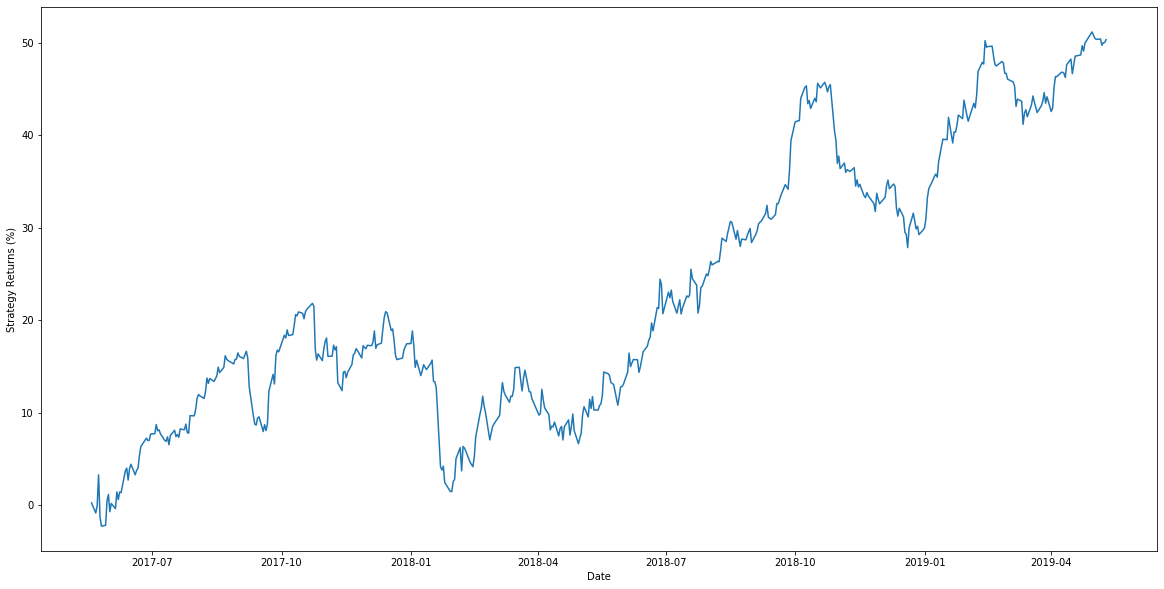

In [66]:
stock_data['Net_cum_returns'] = ((stock_data['Open Price']-stock_data['Close Price'])/stock_data['Open Price']*100).cumsum()

plt.figure(figsize=(20,10))
plt.plot(stock_data.index, stock_data['Net_cum_returns'])
plt.ylabel("Strategy Returns (%)")
plt.xlabel("Date")
plt.show()